# Saudi Aqar prediction

The saudi real estate market is a fast-growing industry  
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses.
It contains information about 3000 properties from various districts 


### Step 1: Importing Libraries

In [3]:
# Helper packages
import pandas as pd   
import numpy as np    
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
#import missingno as msno

# Modeling pre-processing with scikit-learn functionality
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
#from category_encoders.ordinal import OrdinalEncoder
#from feature_engine.encoding import RareLabelEncoder

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

---

### Step 2: Read Dataset
| Reading .CSV file from local directory |

In [4]:
H_data = pd.read_csv('housing.csv')

---

### Step 3: Exploration the Dataset charstaristics 
 


Learning the dtypes of columns' and how many non-null values are there in those columns

In [5]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2974 non-null   int64 
 1   city          2974 non-null   object
 2   district      2974 non-null   object
 3   front         2974 non-null   object
 4   size          2974 non-null   int64 
 5   property_age  2974 non-null   int64 
 6   bedrooms      2974 non-null   int64 
 7   bathrooms     2974 non-null   int64 
 8   livingrooms   2974 non-null   int64 
 9   kitchen       2974 non-null   int64 
 10  garage        2974 non-null   int64 
 11  driver_room   2974 non-null   int64 
 12  maid_room     2974 non-null   int64 
 13  furnished     2974 non-null   int64 
 14  ac            2974 non-null   int64 
 15  roof          2974 non-null   int64 
 16  pool          2974 non-null   int64 
 17  frontyard     2974 non-null   int64 
 18  basement      2974 non-null   int64 
 19  duplex

In [6]:
H_data.shape

(2974, 25)

In [7]:
H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


#### Getting the statistical summary of dataset

In [38]:
H_data.describe().T

,count,mean,std,min,25%,50%,75%,max
size,2974.0,366.525891,209.059809,1.0,270.0,330.0,400.0,5000.0
property_age,2974.0,5.133490,7.664641,0.0,0.0,2.0,8.0,36.0
bedrooms,2974.0,5.087761,1.242549,1.0,4.0,5.0,6.0,7.0
bathrooms,2974.0,4.604573,0.701490,1.0,4.0,5.0,5.0,5.0
livingrooms,2974.0,2.238399,0.915901,1.0,2.0,2.0,3.0,5.0
kitchen,2974.0,0.911231,0.284458,0.0,1.0,1.0,1.0,1.0
garage,2974.0,0.799597,0.400370,0.0,1.0,1.0,1.0,1.0
driver_room,2974.0,0.492939,0.500034,0.0,0.0,0.0,1.0,1.0
maid_room,2974.0,0.792872,0.405317,0.0,1.0,1.0,1.0,1.0
furnished,2974.0,0.120377,0.325456,0.0,0.0,0.0,0.0,1.0


#### Look for missing value 

In [9]:
H_data.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         62
dtype: int64

In [10]:
H_data.dtypes

Unnamed: 0       int64
city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
driver_room      int64
maid_room        int64
furnished        int64
ac               int64
roof             int64
pool             int64
frontyard        int64
basement         int64
duplex           int64
stairs           int64
elevator         int64
fireplace        int64
price            int64
details         object
dtype: object

---

### Step 4: cleaning the Dataset  
 


Deleting the Unnamed:0 columnn as it has no use in the dataset

In [11]:
H_data.drop('Unnamed: 0', inplace=True, axis=1)

In [12]:
H_data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


check the rent due frequnetly

In [13]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شهري') != -1 or details.find('بالشهر') != -1):
        rent = 'Monthly'
    elif( details.find('يومي') != -1 or details.find('باليوم') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'rent frequnetly'] = H_data.loc[:,'details'].apply(fixRent)

In [14]:
H_data.loc[:,['price',"details",'rent frequnetly']]

,price,details,rent frequnetly
0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,Unkown
2,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,Monthly
3,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,Unkown
4,80000,الجزء الثالث والاخير للتصوير\n================...,Unkown
...,...,...,...
2969,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...,Unkown
2970,50000,فيلا دورين درج داخلي مجددة,Unkown
2971,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,Unkown
2972,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...,Monthly


In [15]:
H_data.groupby(['rent frequnetly']).size()

rent frequnetly
Daily         3
Monthly      54
Unkown     2917
dtype: int64

In [16]:
H_data[H_data['rent frequnetly'] == 'Daily']

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,rent frequnetly
363,جدة,حي الزمرد,شمال,350,0,4,4,1,1,1,...,1,1,0,0,1,0,0,3000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...,Daily
1279,جدة,حي الشاطئ,غرب,350,2,3,4,2,1,1,...,1,1,0,1,1,0,0,2500,فيلا مؤثثه نظيفه جدا للايجار اليومي \nبالسعر ا...,Daily
2411,جدة,حي الزمرد,جنوب,550,7,4,4,3,1,1,...,1,1,0,1,0,0,1,2000,فيلا للايجار اليومي بخصوصية تامه,Daily


In [17]:
H_data['city'].value_counts().to_frame()

,city
الخبر,778
الرياض,770
الدمام,722
جدة,704


In [18]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('دور') != -1 ):
        rent = 'floor'
    elif( details.find('شقه') != -1 or details.find('شقة') != -1):
        rent = 'apartment'
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 or details.find('دوبلكس') != -1 or 
        details.find('بيت') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 or details.find('فلا') != -1
        or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1):  
        rent = 'house'
    else:
        rent = 'Unkown'
        
    return rent

H_data.loc[:,'Accommodation types'] = H_data.loc[:,'details'].apply(fixTypes)

In [19]:
H_data.groupby(['city', 'district','Accommodation types'])['size'].mean().to_frame()

size
city   district       Accommodation types            
 الخبر    حي الامواج  floor                436.575000
                      house                428.500000
          حي البحيرة  floor                300.000000
                      house                375.000000
          حي التحلية  Unkown               205.000000
...                                               ...
 جدة      حي بريمان   house                350.000000
          حي طيبة     Unkown               325.000000
                      floor                474.545455
                      house                464.250000
          حي مشرفة    floor                437.000000

[368 rows x 1 columns]

##### Visualizing the correlations between variables

In [121]:
H_data.corr().style.background_gradient(cmap="Blues")

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
size,1.000000,0.300593,0.197945,0.117051,0.135198,-0.059011,0.145242,0.261020,0.094447,0.064829,-0.000744,0.075776,0.008752,0.126488,0.186701,-0.202631,0.024427,0.073706,0.163079,0.405481
property_age,0.300593,1.000000,0.023528,-0.019207,0.036240,0.113275,-0.116345,0.233039,0.117826,-0.087348,0.038775,-0.050180,-0.059164,0.035238,0.064804,-0.217279,0.056679,-0.063981,0.008110,0.155458
bedrooms,0.197945,0.023528,1.000000,0.421478,0.110473,-0.121649,0.188171,0.004517,0.137623,-0.030291,-0.197605,0.265085,-0.237718,0.227822,-0.023705,0.062552,0.101322,0.066595,0.307524,-0.056966
bathrooms,0.117051,-0.019207,0.421478,1.000000,0.405917,-0.071459,0.202789,0.216425,0.271403,-0.161234,-0.044722,0.197031,-0.186600,0.265030,0.047479,0.150785,0.224904,0.106496,0.031003,0.036376
livingrooms,0.135198,0.036240,0.110473,0.405917,1.000000,-0.019446,0.081716,0.319119,0.076884,-0.142570,0.072884,0.150983,-0.015402,0.176646,0.149854,0.010546,-0.009560,0.190523,-0.087904,0.157504
kitchen,-0.059011,0.113275,-0.121649,-0.071459,-0.019446,1.000000,0.017997,0.061805,0.053441,0.108196,0.183026,-0.075163,0.114432,-0.097538,0.038939,-0.073457,-0.025606,0.069510,-0.046519,0.079542
garage,0.145242,-0.116345,0.188171,0.202789,0.081716,0.017997,1.000000,0.199586,0.249875,0.105177,0.091250,0.154383,0.039257,0.281759,0.070679,0.098441,0.055974,0.127958,0.110465,0.092557
driver_room,0.261020,0.233039,0.004517,0.216425,0.319119,0.061805,0.199586,1.000000,0.311430,-0.040246,0.209975,0.086044,0.026305,0.156510,0.145605,-0.154808,0.114132,0.202340,-0.030551,0.292600
maid_room,0.094447,0.117826,0.137623,0.271403,0.076884,0.053441,0.249875,0.311430,1.000000,0.056485,0.251201,0.113299,-0.107305,0.119643,0.072928,-0.045613,0.272624,0.128182,-0.007029,0.188583
furnished,0.064829,-0.087348,-0.030291,-0.161234,-0.142570,0.108196,0.105177,-0.040246,0.056485,1.000000,0.304718,-0.012621,0.259020,0.065540,0.004803,-0.104485,-0.075841,0.079335,0.023740,0.150448


##### Find the top 5 most correlation features with Price

In [126]:
most_correlated = H_data.corr().abs()['price'].sort_values(ascending=False)
# The top 5 most correlation features with price
most_correlated = most_correlated[:6]
most_correlated

price          1.000000
size           0.405481
driver_room    0.292600
basement       0.278105
ac             0.241923
pool           0.231481
Name: price, dtype: float64

#### Data Visualization

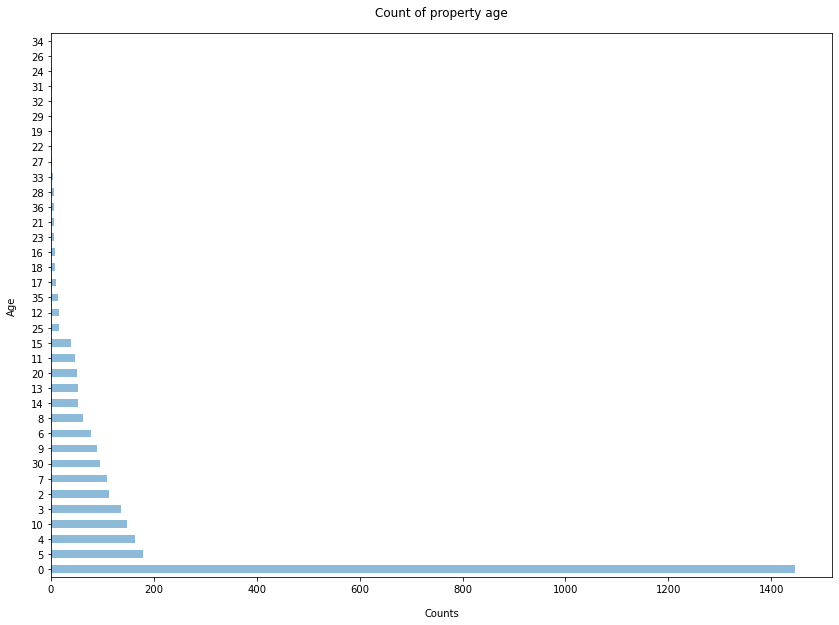

In [79]:
H_data['property_age'].value_counts().plot(kind='barh', figsize=(14, 10),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Age", labelpad=14)
plt.title("Count of property age", y=1.02);

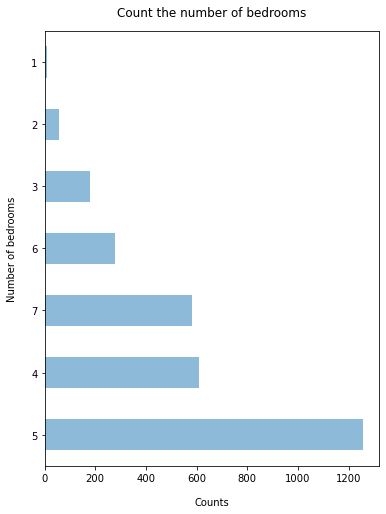

In [71]:
H_data['bedrooms'].value_counts().plot(kind='barh', figsize=(6, 8),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of bedrooms", labelpad=14)
plt.title("Count the number of bedrooms", y=1.02);

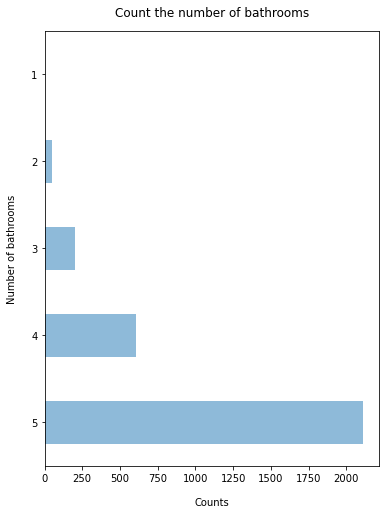

In [72]:
H_data['bathrooms'].value_counts().plot(kind='barh', figsize=(6, 8),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of bathrooms", labelpad=14)
plt.title("Count the number of bathrooms", y=1.02);

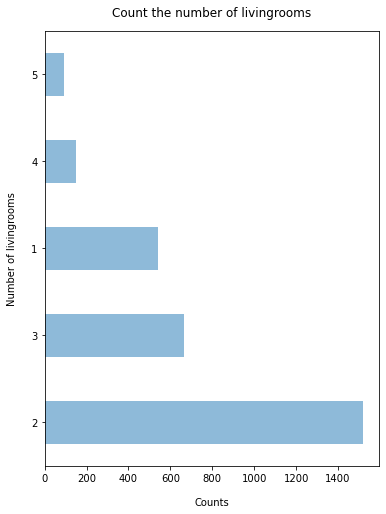

In [73]:
H_data['livingrooms'].value_counts().plot(kind='barh', figsize=(6, 8),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of livingrooms", labelpad=14)
plt.title("Count the number of livingrooms", y=1.02);

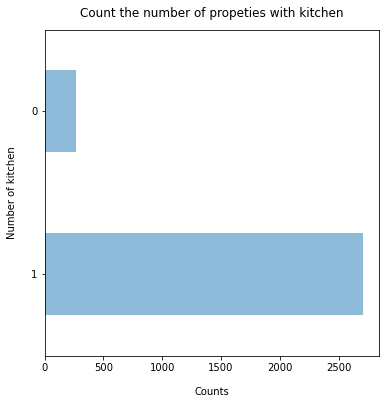

In [95]:
H_data['kitchen'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of kitchen", labelpad=14)
plt.title("Count the number of propeties with kitchen", y=1.02); # 0= No | 1= Yes

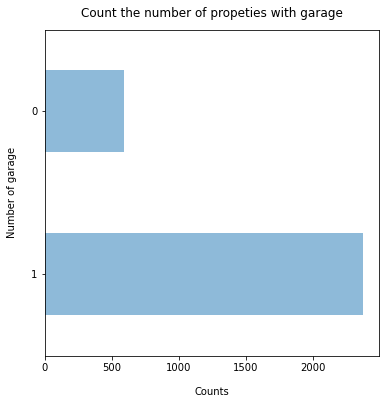

In [111]:
H_data['garage'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of garage", labelpad=14)
plt.title("Count the number of propeties with garage", y=1.02); # 0= No | 1= Yes

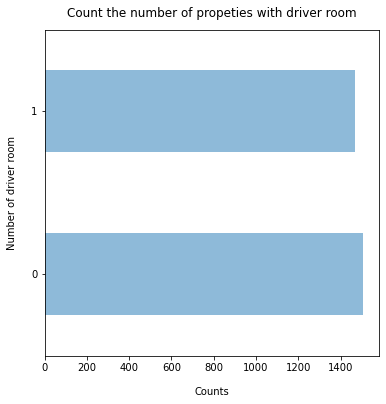

In [98]:
H_data['driver_room'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of driver room", labelpad=14)
plt.title("Count the number of propeties with driver room", y=1.02); # 0= No | 1= Yes

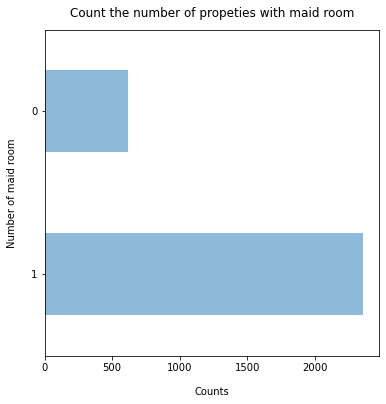

In [100]:
H_data['maid_room'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of maid room", labelpad=14)
plt.title("Count the number of propeties with maid room", y=1.02); # 0= No | 1= Yes

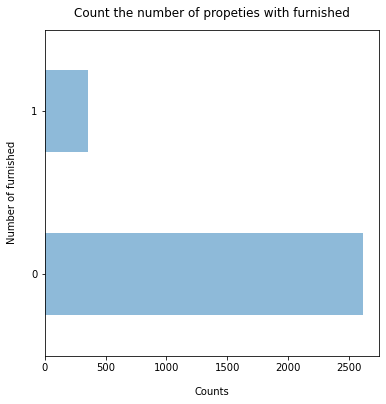

In [101]:
H_data['furnished'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of furnished", labelpad=14)
plt.title("Count the number of propeties with furnished", y=1.02); # 0= No | 1= Yes

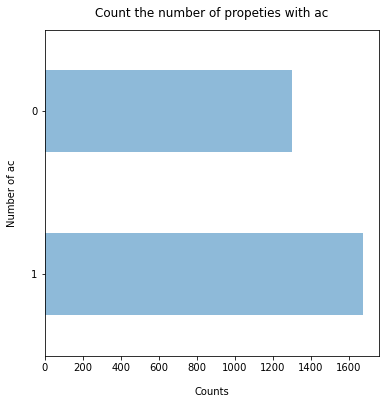

In [102]:
H_data['ac'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of ac", labelpad=14)
plt.title("Count the number of propeties with ac", y=1.02); # 0= No | 1= Yes

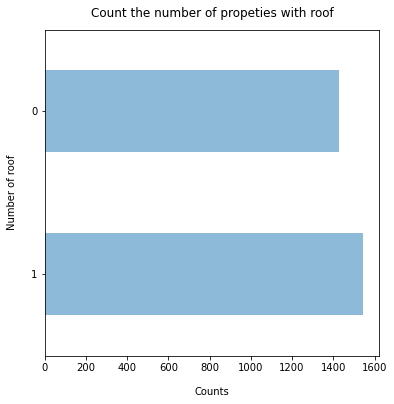

In [103]:
H_data['roof'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of roof", labelpad=14)
plt.title("Count the number of propeties with roof", y=1.02); # 0= No | 1= Yes

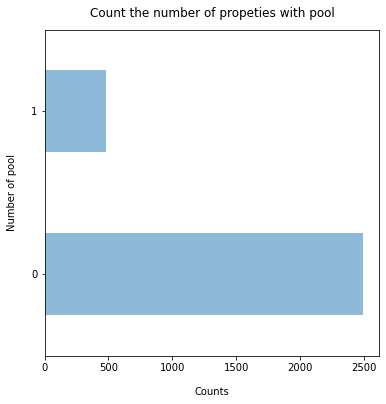

In [104]:
H_data['pool'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of pool", labelpad=14)
plt.title("Count the number of propeties with pool", y=1.02); # 0= No | 1= Yes

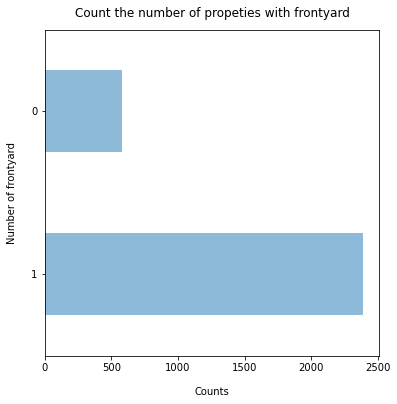

In [105]:
H_data['frontyard'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of frontyard", labelpad=14)
plt.title("Count the number of propeties with frontyard", y=1.02); # 0= No | 1= Yes

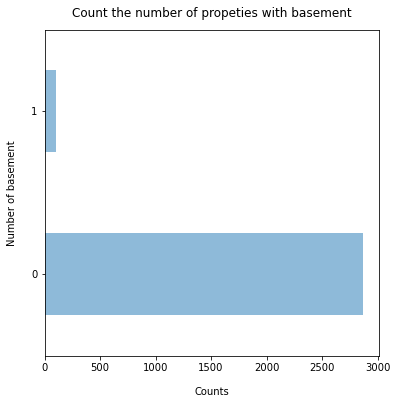

In [106]:
H_data['basement'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of basement", labelpad=14)
plt.title("Count the number of propeties with basement", y=1.02); # 0= No | 1= Yes

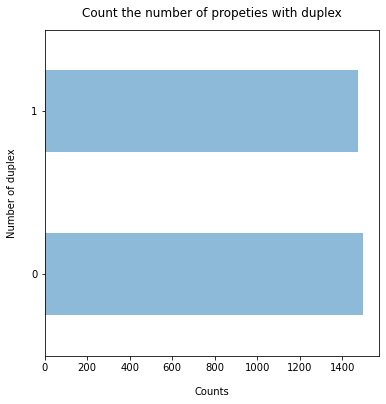

In [107]:
H_data['duplex'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of duplex", labelpad=14)
plt.title("Count the number of propeties with duplex", y=1.02); # 0= No | 1= Yes

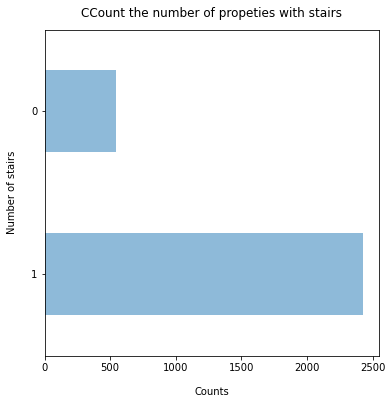

In [108]:
H_data['stairs'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of stairs", labelpad=14)
plt.title("CCount the number of propeties with stairs", y=1.02); # 0= No | 1= Yes

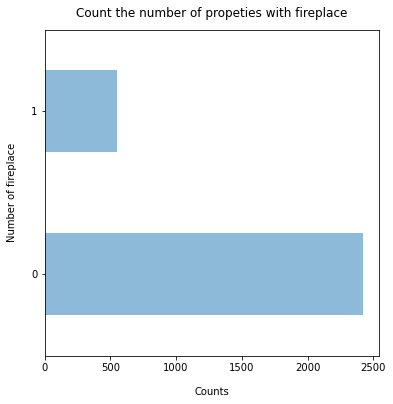

In [109]:
H_data['fireplace'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of fireplace", labelpad=14)
plt.title("Count the number of propeties with fireplace", y=1.02); # 0= No | 1= Yes

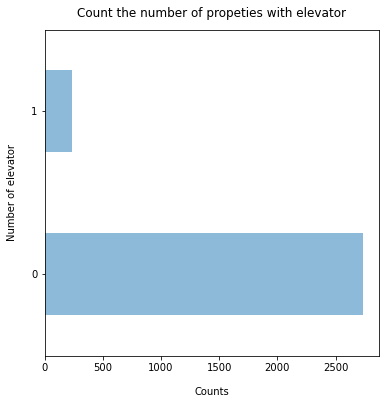

In [110]:
H_data['elevator'].value_counts().plot(kind='barh', figsize=(6, 6),alpha=0.5)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Number of elevator", labelpad=14)
plt.title("Count the number of propeties with elevator", y=1.02); # 0= No | 1= Yes

---

### Step 5: Splitting the data
 


In [20]:
train, test = train_test_split(H_data, train_size=0.7, random_state=123)

In [21]:
train.shape

(2081, 26)

In [22]:
test.shape

(893, 26)

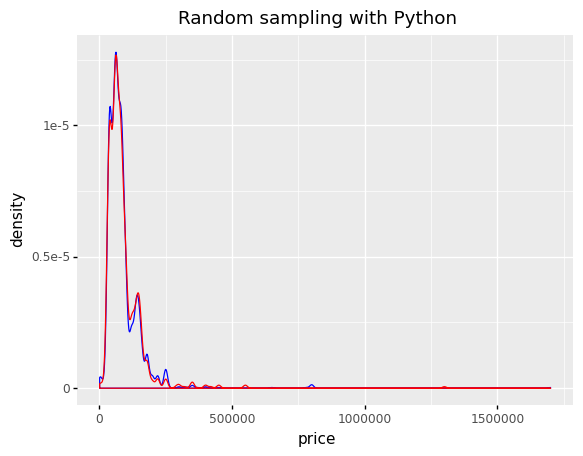

<ggplot: (8789754035258)>

In [23]:
(ggplot(train, aes('price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

In [24]:
# separate features from labels and only use numeric features
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

---

### Step 6: building the models
 
#### Simple linear regression

In [25]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only size feature
lm_fit = lm_mod.fit(X_train[["size"]], y_train)

Text(1, 17, 'y = 34800.30 + 141.72x')

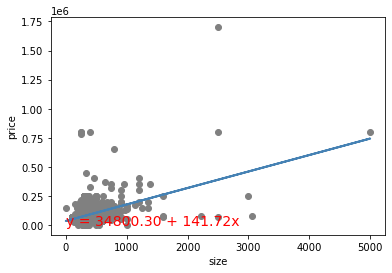

In [26]:
x_train = train["size"]
y_train = train["price"]

a, b = np.polyfit(x_train, y_train, 1)
plt.scatter(x_train, y_train, color='grey')

plt.plot(x_train, a*x_train+b, color='steelblue', linestyle='-', linewidth=2)
plt.xlabel('size')
plt.ylabel('price')

plt.text( 1,17,'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14, color = 'red')

In [27]:
lm_fit.intercept_

array([34800.29540892])

In [28]:
lm_fit.coef_

array([[141.71679741]])

# ALL features

In [29]:
# create new feature set with categorical features dummy encoded
encoder = preprocessing.OneHotEncoder(drop='first')
cat_feat_only = compose.make_column_selector(dtype_include="object")
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[("one-hot", encoder, cat_feat_only)]
  )
X_train_encoded = preprocessor.fit_transform(X_train)

# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with all features
lm_fit = lm_mod.fit(X_train_encoded, y_train)

# Some features 

In [30]:

sub_X_train = X_train.drop([ 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'ac', 'roof',  'frontyard', 
        'stairs', 'elevator', 'fireplace', 'details'
       ], inplace=False, axis=1)
Not_all_X_train_encoded = preprocessor.fit_transform(sub_X_train)

# create linear regression model object
lm_mod_sub = linear_model.LinearRegression()

# fit linear model with some feature
lm_fit_sub = lm_mod_sub.fit(Not_all_X_train_encoded, y_train)

---

### Step 6: evaluating and selecting the model 
 


##### Assessing model accuracy

In [31]:
# feature sets to compare across
feature_set1 = X_train[["size"]]
feature_set2 = X_train[["size", "property_age",'furnished']]
feature_set3 = X_train_encoded
feature_set4 = Not_all_X_train_encoded
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2, 'lm3': feature_set3
, 'lm4': feature_set4}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=12, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod, 
    X=feat, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [32]:
results

{'lm1': 62683.63676770827,
 'lm2': 62085.37160881539,
 'lm3': 56106.81428791475,
 'lm4': 58336.55215613926}

when k was 10 :
{'lm1': 63861.88148625301,
 'lm2': 63312.426150481464,
 'lm3': 58403.48428552358,
 'lm4': 60442.621954590315}

# Partial least squares

In [33]:
# create linear model object
pls_mod = cross_decomposition.PLSRegression()

# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps to normalize and one-hot encode
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse=False)
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# combine all steps into a pre-processing pipeline
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("std_encode", scaler, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
  ])

# create a pipeline object that combines model with recipe
model_pipeline = pipeline.Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("pls", pls_mod),
])

# Create grid of hyperparameter values
hyper_grid = {'pls__n_components': range(2, 28, 2)}

# Tune a knn model using grid search
grid_search = model_selection.GridSearchCV(
  model_pipeline, 
  hyper_grid, 
  cv=kfold, 
  scoring=loss
  )
  
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)


54638.85283719682

In [34]:
results.best_estimator_.get_params().get('pls__n_components')


4

### Tuning

In [35]:
# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# create object to save results
results = {}

# iterate over over 2, 4, 6, ..., 26 components and train model
for n_comp in range(1, 19, 1):
  # create PCA object with n components
  pca = decomposition.PCA(n_components=n_comp)
  
# combine all steps into a pre-processing pipeline
  preprocessor = compose.ColumnTransformer(
    remainder="passthrough",
    transformers=[
    ("std_encode", scaler, num_feat_only),
    ("pca_encode", pca, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
    ])

  # create linear model object
  lm_mod = linear_model.LinearRegression()

  # create a pipeline object that combines model with recipe
  model_pipeline = pipeline.Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lm", lm_mod),
  ])

  # train and fit our model
  cv_results = model_selection.cross_val_score(
    estimator=model_pipeline, 
    X=X_train, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )

  # get results
  results[n_comp] = np.absolute(cv_results.mean())

In [36]:
pd.DataFrame.from_dict(
  results,
  orient='index',
  columns=['RMSE']
  ).rename_axis('n_components').reset_index()

,n_components,RMSE
0,1,57463.837545
1,2,57460.098101
2,3,57458.677343
3,4,57456.504322
4,5,57456.415786
5,6,57452.435661
6,7,57455.682411
7,8,57455.976885
8,9,57455.300325
9,10,57451.585639
